In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [156]:
data = pd.read_csv("OnlineRetail.csv",encoding="latin1")
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [157]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

data["InvoiceYearMonth"] = data["InvoiceDate"].map(lambda data: 100 * data.year + data.month)

data["Revenue"] = data["UnitPrice"] * data["Quantity"]

tx_revenue = data.groupby(["InvoiceYearMonth"])["Revenue"].sum().reset_index()

tx_revenue

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


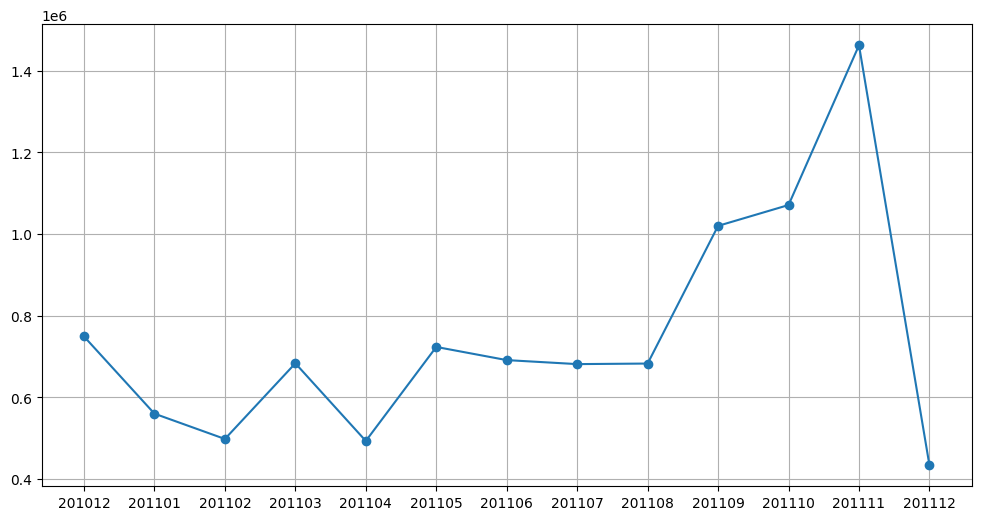

In [158]:
plt.figure(figsize=(12,6))
plt.plot(tx_revenue["InvoiceYearMonth"].to_numpy(dtype=str),tx_revenue["Revenue"].to_numpy(),marker="o")
plt.grid()
plt.show()

In [159]:
tx_revenue["MonthlyGrowth"] = tx_revenue["Revenue"].pct_change()

tx_revenue.head()

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163


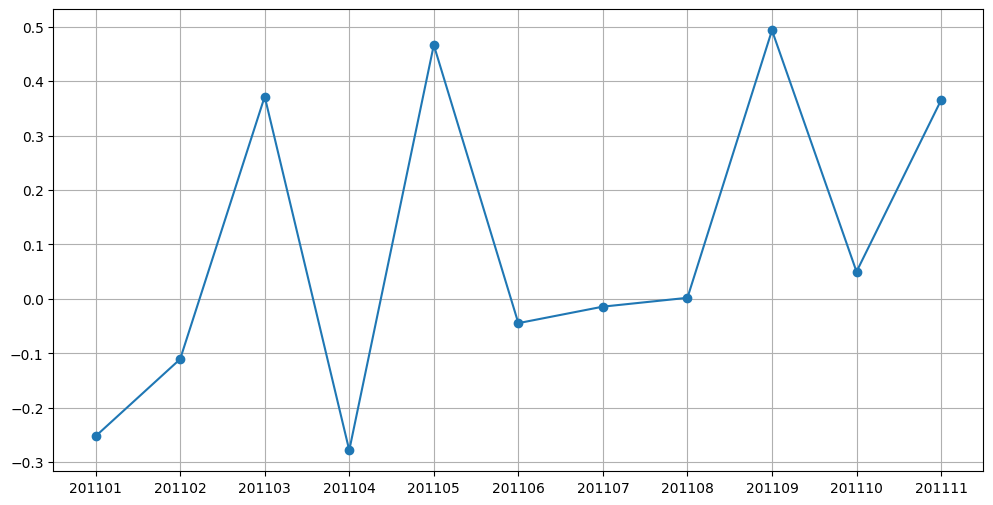

In [160]:
plt.figure(figsize=(12,6))
plt.plot(tx_revenue.query("InvoiceYearMonth < 201112")["InvoiceYearMonth"].to_numpy(dtype=str),
         tx_revenue.query("InvoiceYearMonth < 201112")["MonthlyGrowth"].to_numpy(),marker="o")
plt.grid()
plt.show()

In [161]:
tx_uk = data.query("Country=='United Kingdom'").reset_index()

tx_monthly_active = tx_uk.groupby(["InvoiceYearMonth"])["CustomerID"].nunique().reset_index()

tx_monthly_active

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


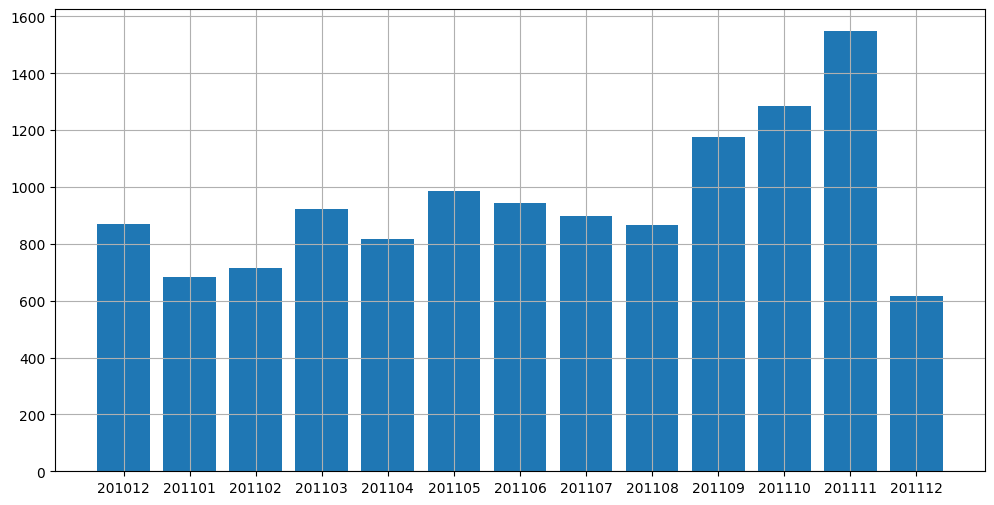

In [162]:
plt.figure(figsize=(12,6))
plt.bar(tx_monthly_active["InvoiceYearMonth"].to_numpy(dtype=str),tx_monthly_active["CustomerID"].to_numpy())
plt.grid()
plt.show()

In [163]:

tx_monthly_sales = tx_uk.groupby(["InvoiceYearMonth"])["Quantity"].sum().reset_index()
tx_monthly_sales

,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


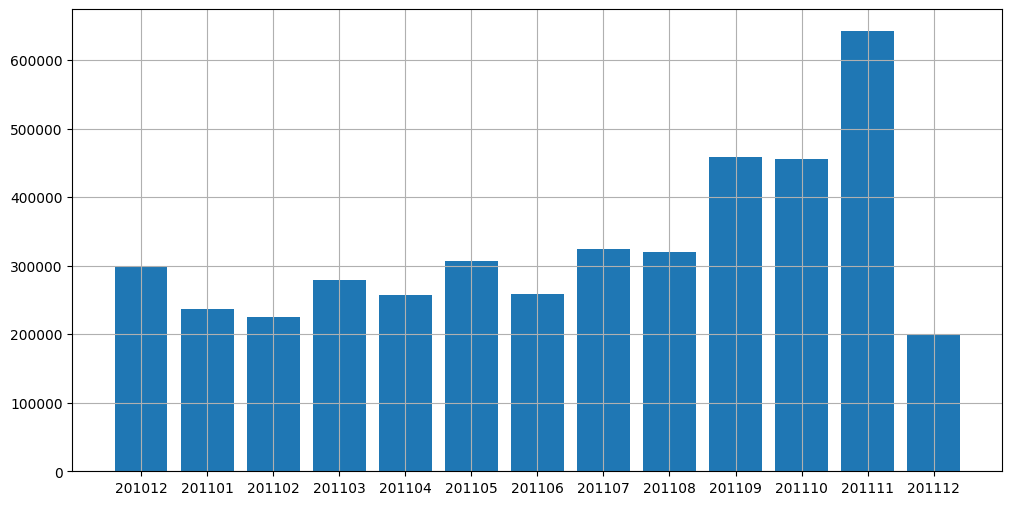

In [164]:
plt.figure(figsize=(12,6))
plt.bar(tx_monthly_sales["InvoiceYearMonth"].to_numpy(dtype=str),tx_monthly_sales["Quantity"].to_numpy())
plt.grid()
plt.show()

In [165]:
tx_monthly_order_avg = tx_uk.groupby(["InvoiceYearMonth"])["Revenue"].mean().reset_index()
tx_monthly_order_avg

,InvoiceYearMonth,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,17.713823
6,201106,16.714748
7,201107,15.723497
8,201108,17.315899
9,201109,18.931723


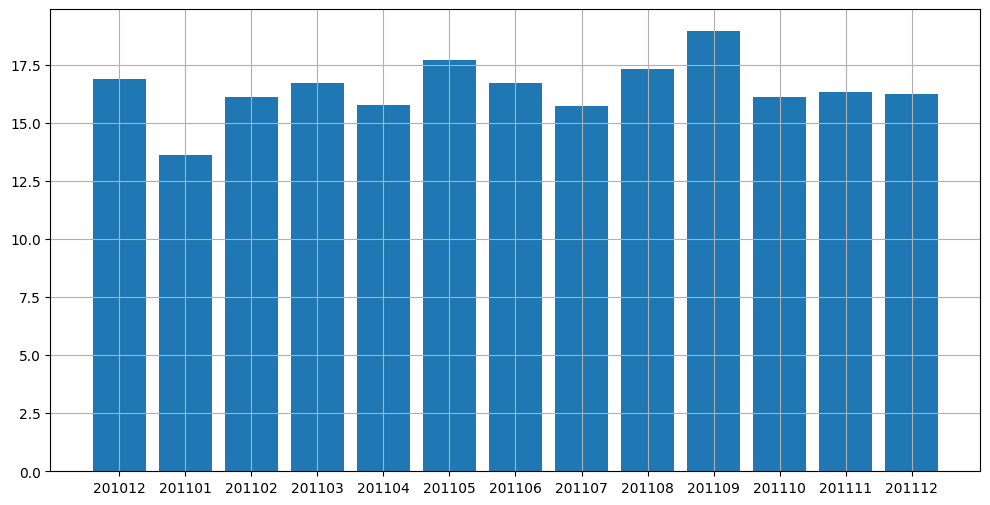

In [166]:
plt.figure(figsize=(12,6))
plt.bar(tx_monthly_order_avg["InvoiceYearMonth"].to_numpy(dtype=str),tx_monthly_order_avg["Revenue"].to_numpy())
plt.grid()
plt.show()

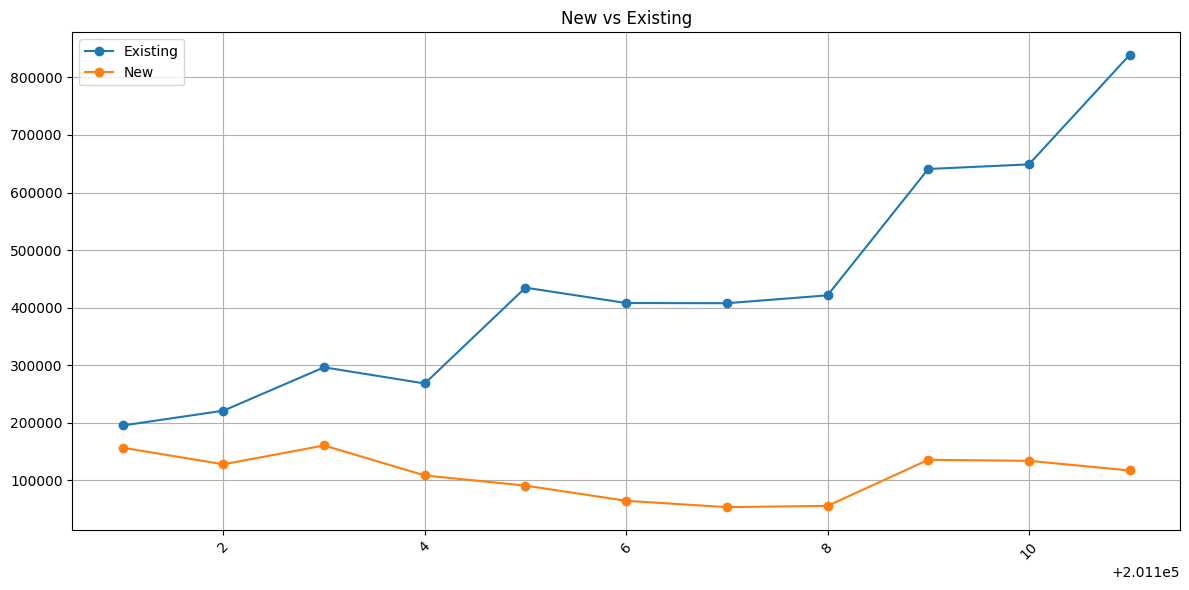

In [167]:

filtered_data = tx_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")

existing_users = filtered_data[filtered_data['UserType'] == 'Existing']
new_users = filtered_data[filtered_data['UserType'] == 'New']

plt.figure(figsize=(12, 6))

plt.plot(existing_users['InvoiceYearMonth'], existing_users['Revenue'], label='Existing', marker='o')

plt.plot(new_users['InvoiceYearMonth'], new_users['Revenue'], label='New', marker='o')

plt.title('New vs Existing')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# نمایش نمودار
plt.tight_layout()
plt.show()

